# Read and plot output Crocus files
 Marie Dumont and Matthieu Lafaysse, Feb. 2018 

In [16]:
# modules import
from pylab import *
import netCDF4
import os, sys
import pandas as pd

sys.path.append('/home/tintino/Documents/snowschool_lautaret_2018/SSWS_notebook_clean/snowtools_git')
#os.environ["PYTHONPATH"]="PYTHONPATH:/home/tintino/Documents/snowschool_lautaret_2018/SSWS_notebook_clean/snowtools_git/"
from snowtools_git.plots.proReader import ProReader

In [4]:
## input file name
# Example wihth a simulation at col du lautaret
#name='PRO_1994100101_1995100100_24h.nc' # example from Col de Porte
# cole du lautaret simulation:
#name='/home/tintino/Documents/snowschool_lautaret_2018/Crocus_files/PRO_2017080106_2018021706_f06.nc'

name = '/home/tintino/Documents/snowschool_lautaret_2018/Crocus_files/evelein/PRO_2016100106_2017083106.nc'

In [5]:
### display variable names

crocus = netCDF4.Dataset(name) # classic opening of netCDF file

#WSN_T_ISBA = SWE (time, Number_of_Tile, Number-of_points)
#DSN_T_ISBA = Snow depth (time, Number_of_Tile, Number-of_points)


#print crocus.variables
#print crocus.variables['aspect']

In [9]:
### Load pro file

pro=ProReader(name) # add point argument if several points (,point=i)

Lecture fichier /home/tintino/Documents/snowschool_lautaret_2018/Crocus_files/evelein/PRO_2016100106_2017083106.nc
Point 0 selectionne

Fill data with 0 for variable SNOWHEAT (old method)
Fill data with 0 for variable SNOWLIQ
Fill data with 0 for variable SNOWGRAN2 (old method)
Fill data with 0 for variable SNOWGRAN1 (old method)
Fill data with 0 for variable SNOWAGE (old method)
Fill data with 0 for variable SNOWRAM
Fill data with np.nan for variable WSN_VEG (old method)
Fill data with 0 for variable SNOWHIST (old method)
Fill data with 0 for variable SNOWSPHER
Fill data with 0 for variable SNOWTYPE
Fill data with 0 for variable SNOWTEMP
Fill data with 0 for variable SNOWRO (old method)
Fill data with 0 for variable SNOWSIZE
Fill data with 0 for variable SNOWSSA
Fill data with 0 for variable SNOWDZ
Fill data with 0 for variable SNOWSHEAR
Fill data with 0 for variable SNOWDEND


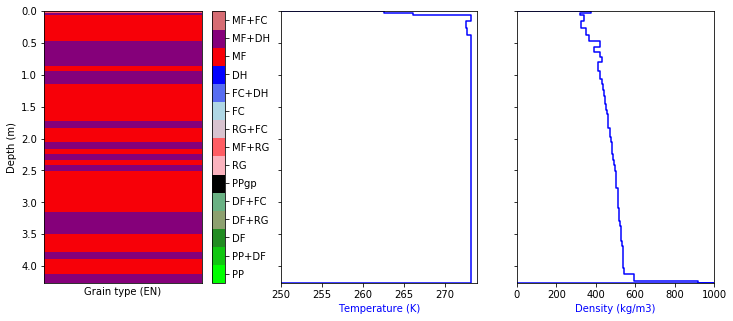

In [14]:
### display snow variable profiles for a given date
import matplotlib.pyplot as plt
date='20170504'
fig, axes = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(12,5))
pro.plot_date(axes[0], "grain", date=date)
depth, temp = pro.plot_date(axes[1], "temp", date=date)
depth2, rho = pro.plot_date(axes[2], "rho", date=date)
# possible var values are : tel, ram, age, swe, rho, ... 
axes[1].set_xlim(250,274)
axes[0].set_ylabel('Depth (m)')
plt.show()

Index([u'date', u'pit_id', u'depth', u'temperature'], dtype='object')
20170504


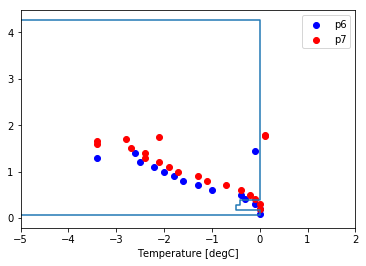

In [27]:
# import density and temperature profile from observation

obs_t = pd.read_csv('/home/tintino/Documents/snowschool_lautaret_2018/Crocus_files/evelein/Temp_profiles_1.csv', sep=',')

print obs_t.columns
#obs_d = pd.read_csv('',sep=',')

# plot model and obs on same plot
print date
plt.figure()
plt.plot(temp-273.15,depth)
plt.scatter( obs_t.temperature[obs_t.pit_id=='p6'],obs_t.depth[obs_t.pit_id=='p6']/100, color='b', label='p6')
plt.scatter(obs_t.temperature[obs_t.pit_id=='p7'],obs_t.depth[obs_t.pit_id=='p7']/100 ,color='r', label='p7')
plt.xlabel('Temperature [degC]')
plt.legend()
plt.xlim(-5,2)
plt.show()

#plt.figure()
#plt.plot(rho,depth2)
#plt.scatter(obs_d.density[obs_d.pit_id==''], obs_d.density[obs_d.pit_id==''])
#plt.xlabel('Density [kg/m3]')
#plt.show()

In [11]:
### display numerical value in the netCDF file


print "depth array", depth
print "temperature array", temp

depth array [0.         0.         0.02526261 0.02526261 0.0564821  0.0564821
 0.16137257 0.16137257 0.26909754 0.26909754 0.38357573 0.38357573
 0.46492256 0.46492256 0.55756751 0.55756751 0.64510415 0.64510415
 0.72831653 0.72831653 0.79521704 0.79521704 0.86812868 0.86812868
 0.9411774  0.9411774  1.06563681 1.06563681 1.13858034 1.13858034
 1.24194706 1.24194706 1.32935159 1.32935159 1.45712176 1.45712176
 1.55666327 1.55666327 1.61679904 1.61679904 1.72930538 1.72930538
 1.83298807 1.83298807 1.89440143 1.89440143 1.9818468  1.9818468
 2.0606356  2.0606356  2.16659031 2.16659031 2.24663679 2.24663679
 2.34058709 2.34058709 2.4184757  2.4184757  2.50195489 2.50195489
 2.60793709 2.60793709 2.67341793 2.67341793 2.7723403  2.7723403
 2.8903932  2.8903932  2.9936053  2.9936053  3.08964041 3.08964041
 3.15372629 3.15372629 3.29147118 3.29147118 3.37357345 3.37357345
 3.50444189 3.50444189 3.60707659 3.60707659 3.68604314 3.68604314
 3.78020759 3.78020759 3.89177962 3.89177962 4.025699

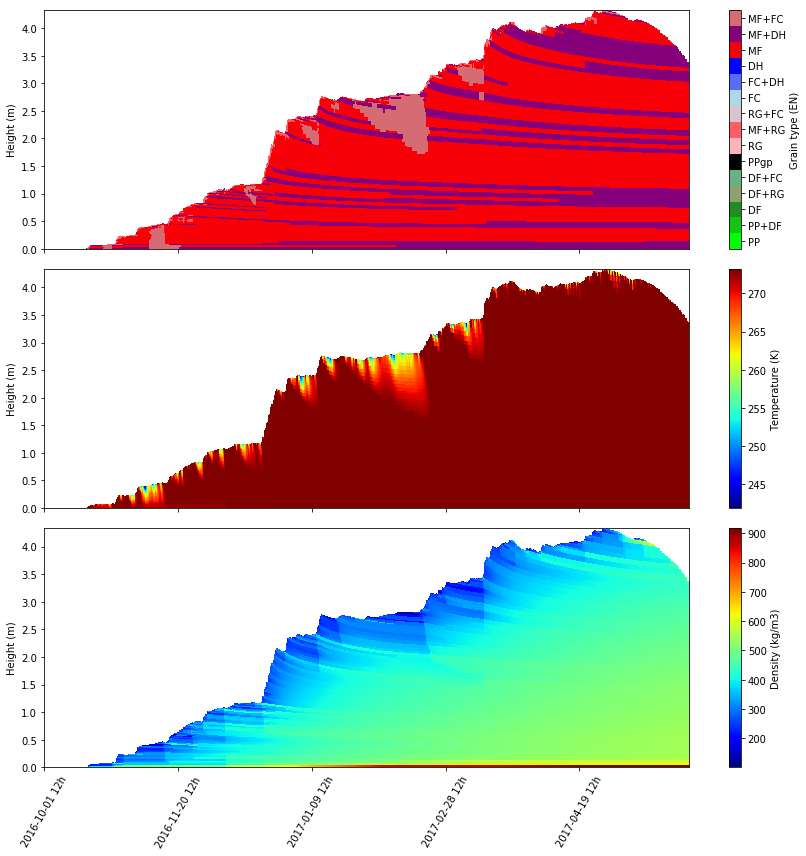

In [13]:
## display the seasonnal evolution of one variable
begin="20161001"
end="20170530"


fig, axes = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(12,12))
pro.plot(axes[0], "grain", b=begin,e=end)
pro.plot(axes[1], "temp", b=begin,e=end)
pro.plot(axes[2], "rho", b=begin,e=end)
## possible variables to plot : tel, ram, age, swe, temp, ...
plt.show()